## Problem Statement:


#### The task is to build a machine learning model that can predict the price of laptops based on their features

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Column Description

 ● Company: Laptop Manufacturer.
 
 ● Product: Brand and Model.
 
 ● TypeName: Laptop Type (Notebook, Ultrabook, Gaming, …etc).
 
 ● Inches: Screen Size.
 
 ● Ram: Total amount of RAM in laptop (GBs).
 
 ● OS: Operating System installed.
 
 ● Weight: Laptop Weight in kilograms.
 
 ● Price_euros: Price of Laptop in Euros. (Target)
 
 ● Screen: screen definition (Standard, Full HD, 4K Ultra HD, Quad HD+).
 
 ● ScreenW: screen width (pixels).
 
 ● ScreenH: screen height (pixels).
 
 ● Touchscreen: whether or not the laptop has a touchscreen.
 
 ● IPSpanel: whether or not the laptop has an IPSpanel.
 
 ● RetinaDisplay: whether or not the laptop has retina display.
 
 ● CPU_company
 
 ● CPU_freq: frequency of laptop CPU (Hz).
 
 ● CPU_model
 
 ● PrimaryStorage: primary storage space (GB).
 
 ● PrimaryStorageType: primary storage type (HDD, SSD, Flash Storage,
   Hybrid).
 
 ● SecondaryStorage: secondary storage space if any (GB).
 
 ● SecondaryStorageType: secondary storage type (HDD, SSD, Hybrid, None).
 
 ● GPU_company
 
 ● GPU_model
 

## Data Collection

In [2]:
data = pd.read_csv(r"D:\unified mentor internship\laptop_prices.csv")

In [3]:
data.iloc[:,:14].head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes


In [4]:
data.iloc[:,14:].head()

,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


## Initial Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

There is 23 Columns and 1275 rows are there.In that 14 categorical columns and 9 Numerical columns are present.

In [6]:
data.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

There is no null values in the dataset

In [7]:
data.duplicated().sum()

0

There is no duplicates in the Dataset

In [8]:
data.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

Data Types all are perfect.

In [9]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

## Advanced EDA

### Univarate Analysis

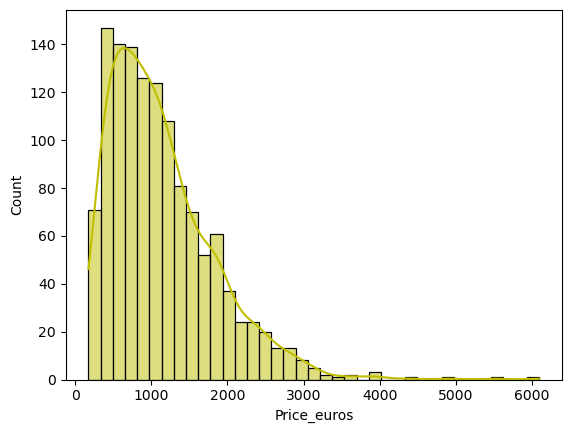

In [10]:
# Target variable
sns.histplot(data['Price_euros'],kde=True,color='y');

In this dataset,Most of the laptop prices range from 500-3000 euros. 

In [11]:
data['Company'].value_counts()
data['Company'].nunique()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

19

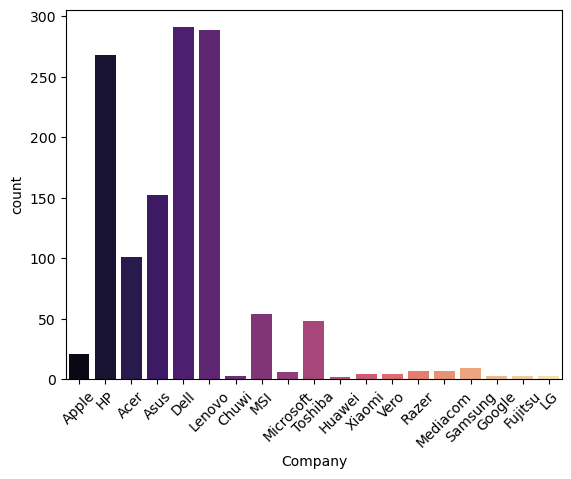

In [12]:
sns.countplot(data=data,x='Company',palette='magma')
plt.xticks(rotation=45);

They are 19 unique companies are there.In that Dell have the top count.

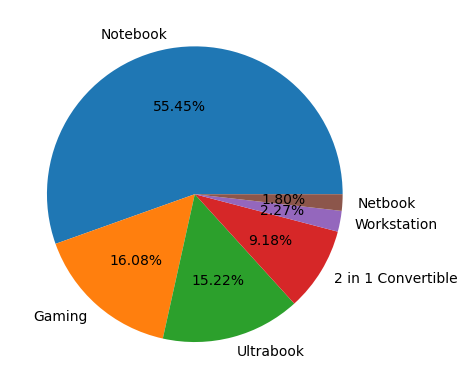

In [13]:
type_data = data['TypeName'].value_counts()
plt.pie(type_data.values,labels=type_data.index,autopct="%.2f%%");

In this notebook type laptops are more present.

In [14]:
data.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

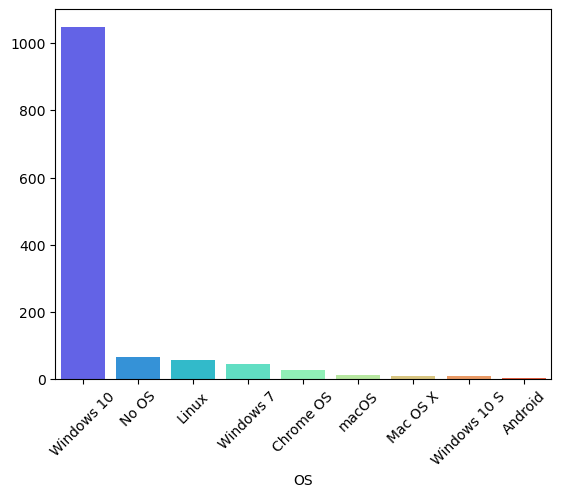

In [15]:
os_dat = data['OS'].value_counts()
sns.barplot(x=os_dat.index,y=os_dat.values,palette='rainbow')
plt.xticks(rotation=45)
plt.show();

In this dataset Mostly windows 10 laptops are present.

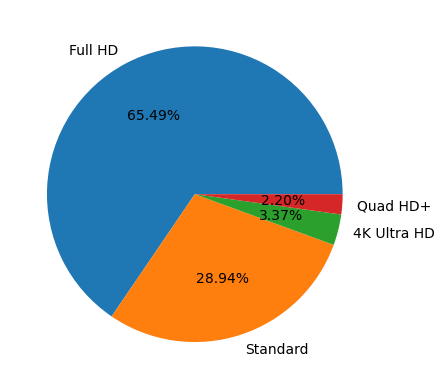

In [16]:
screen_data = data['Screen'].value_counts()
plt.pie(screen_data,labels=screen_data.index,autopct='%.2f%%');

65% of the laptops are FullHD Laptops.

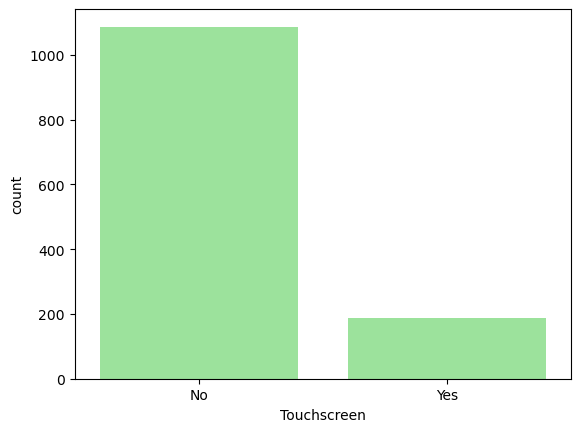

In [17]:
sns.countplot(x=data['Touchscreen'],color='lightgreen');

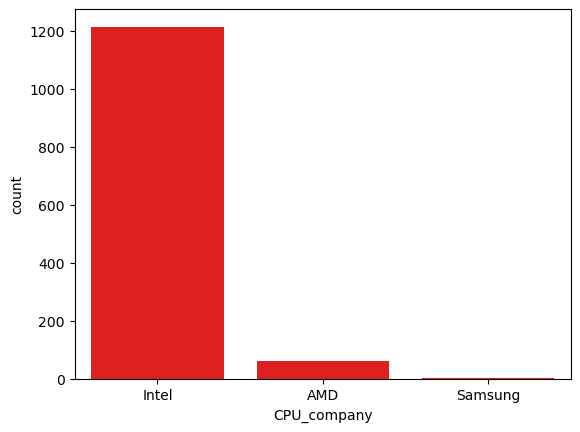

In [18]:
sns.countplot(x=data['CPU_company'],color='red');

Most of the laptops cpu company is intel.

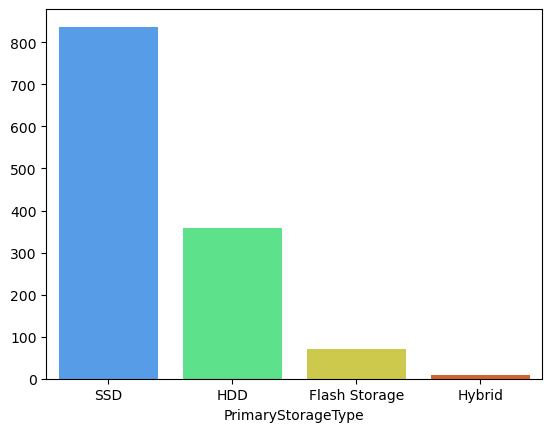

In [19]:
primary_data=data['PrimaryStorageType'].value_counts()
sns.barplot(x=primary_data.index,y=primary_data.values,palette='turbo')
plt.show();

Most laptops used SSD as primary storage. 


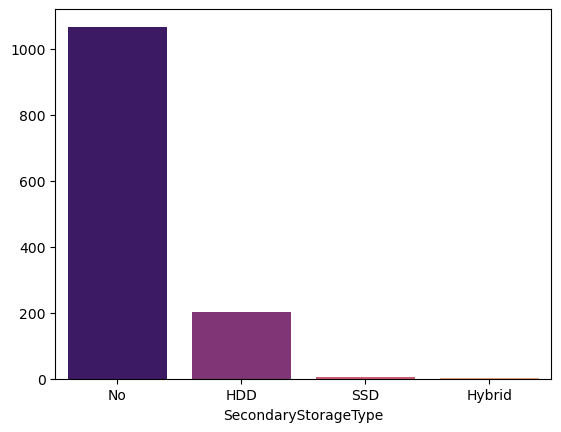

In [20]:
secondary_data=data['SecondaryStorageType'].value_counts()
sns.barplot(x=secondary_data.index,y=secondary_data.values,palette='magma')
plt.show();

Most of the laptops doesn't have secondary storage

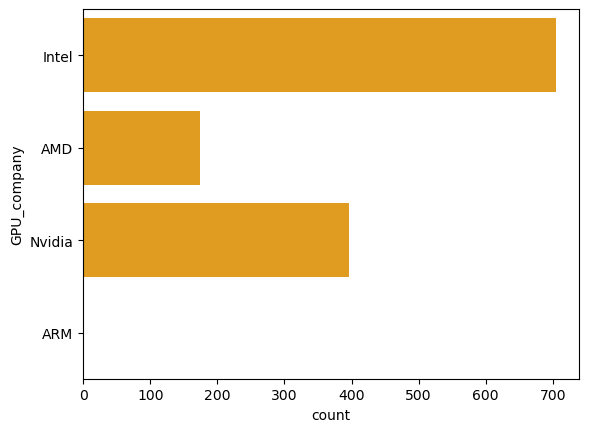

In [21]:
sns.countplot(data['GPU_company'],color='orange');

Most of the laptops GPU company is intel.

## Bivariate Analysis

In [22]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

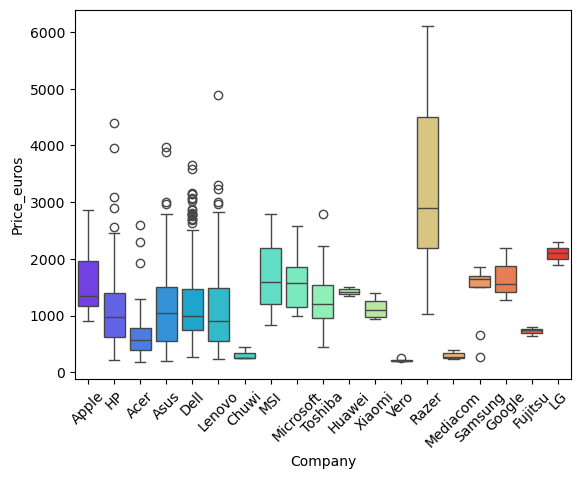

In [23]:
sns.boxplot(x='Company',y='Price_euros',data=data,palette='rainbow')
plt.xticks(rotation=45);

Some of the companies having outliers ,In Razer company there is high price range is there.

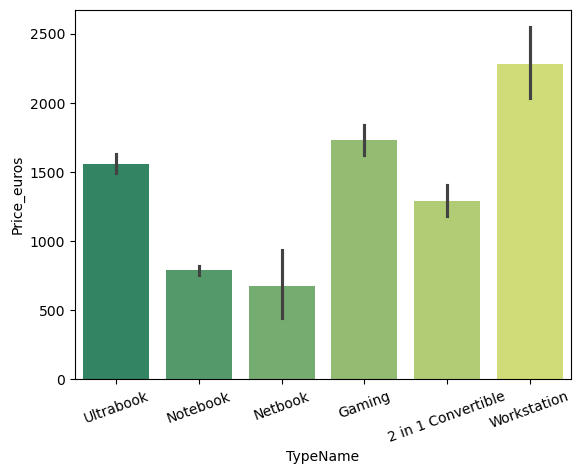

In [24]:
sns.barplot(x=data['TypeName'],y=data['Price_euros'],palette='summer')
plt.xticks(rotation=20);

workstation type is the most costliest laptop and netbook is the most cheapest.

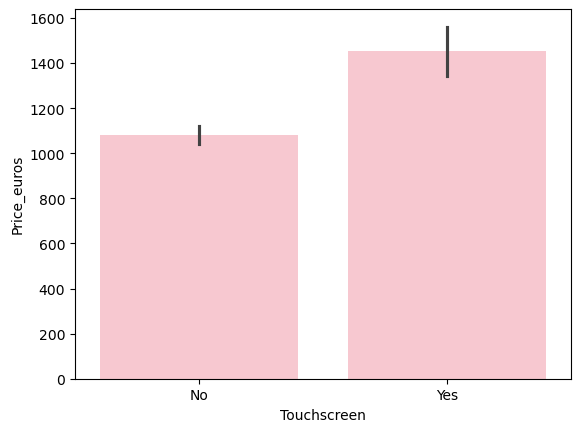

In [25]:
sns.barplot(x=data['Touchscreen'],y=data['Price_euros'],color='pink');

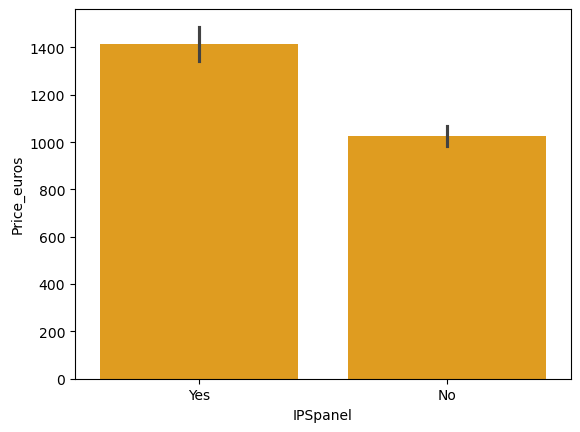

In [26]:
sns.barplot(x=data['IPSpanel'],y=data['Price_euros'],color='orange');

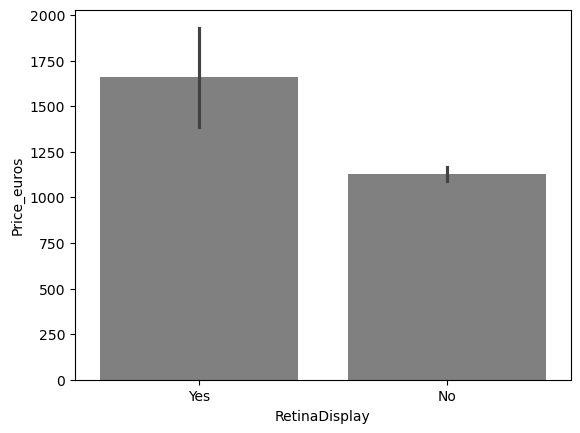

In [27]:
sns.barplot(x=data['RetinaDisplay'],y=data['Price_euros'],color='gray');

when the laptops containing touchscreen,retinadisplay,ips panel are more price.

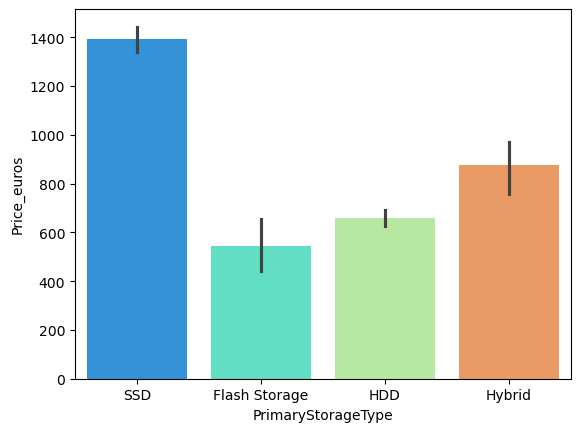

In [28]:
sns.barplot(x=data['PrimaryStorageType'],y=data['Price_euros'],palette='rainbow');

SSD storage is the costliest,flash storage is the cheapest.

<Axes: xlabel='GPU_company', ylabel='Price_euros'>

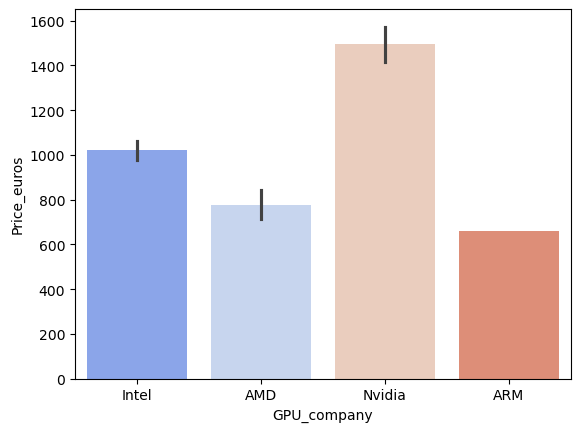

In [29]:
sns.barplot(x=data['GPU_company'],y=data['Price_euros'],palette='coolwarm')

Nvdia is the most costliest gpu company.

<Axes: xlabel='CPU_company', ylabel='Price_euros'>

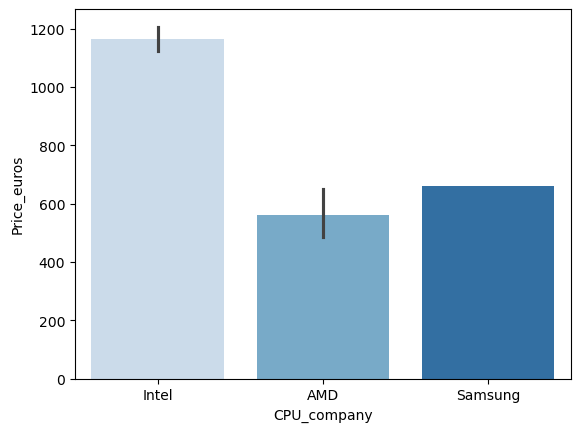

In [30]:
sns.barplot(x=data['CPU_company'],y=data['Price_euros'],palette='Blues')

Intel is the most costliest cpu company 

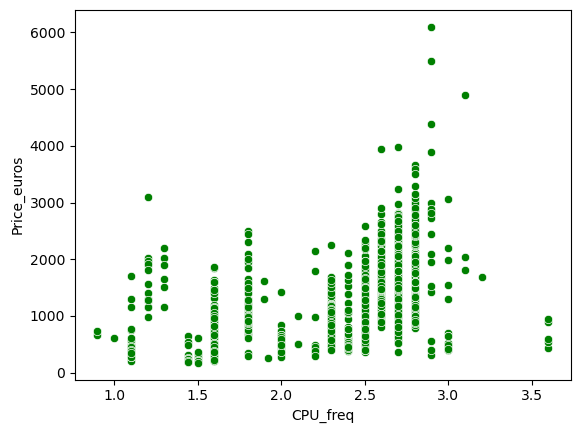

In [31]:
sns.scatterplot(x=data['CPU_freq'],y=data['Price_euros'],color='green');

In [32]:
data['CPU_freq'].corr(data['Price_euros'])

0.4288472377316178

There is positive correlation in between price and cpu_freq.

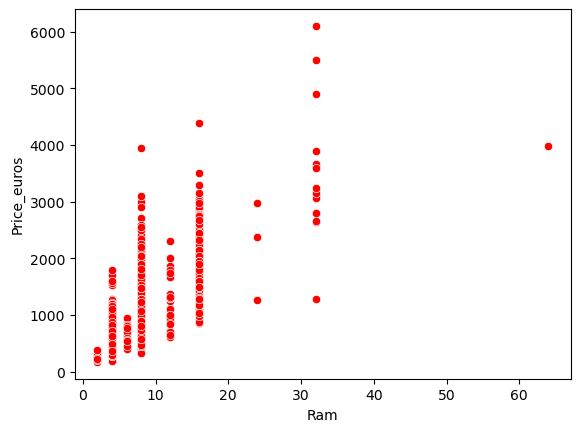

In [33]:
sns.scatterplot(x=data['Ram'],y=data['Price_euros'],color='red');

In [34]:
data['Ram'].corr(data['Price_euros'])

0.7402865271622688

There is positive correlation in between price and Ram.

## Multivariate Analysis 

<Axes: >

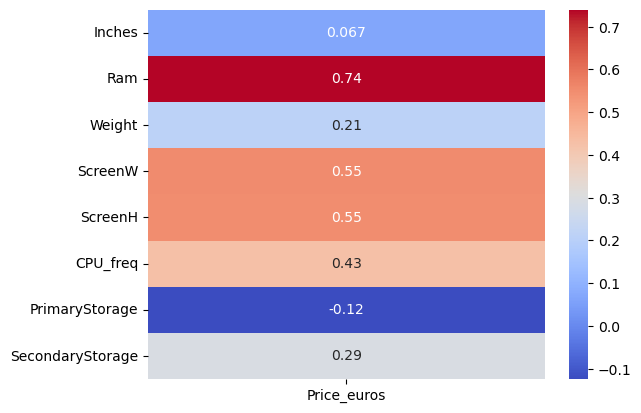

In [35]:
data1 = data.select_dtypes(exclude='object')
data2 = data1.corr()['Price_euros'].drop('Price_euros')
sns.heatmap(data2.to_frame(),annot=True,cmap='coolwarm')

All have positive correlation but one primary storage is negatively correlated.

In [36]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

## Feature Engineering

In [39]:
# creating new column pixel per inch b existing column

In [40]:
data['PPI'] = np.sqrt(data['ScreenW']**2 + data['ScreenH']**2)/data['Inches']
data['TotalStorage']=data['PrimaryStorage']+data['SecondaryStorage']
data.drop(columns=['ScreenW','ScreenH','PrimaryStorage','SecondaryStorage'],inplace=True)

In [41]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'PPI',
       'TotalStorage'],
      dtype='object')

## Main Preprocessing

In [42]:
data['Touchscreen'] = data['Touchscreen'].map(lambda x: 1 if x == 'Yes' else 0 )
data['IPSpanel'] = data['IPSpanel'].map(lambda x : 1 if x == 'Yes' else 0)
data['RetinaDisplay'] = data['RetinaDisplay'].map(lambda x:1 if x == 'Yes' else 0)

In [43]:
data['CPU_model'].unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
       'Ce

In [44]:
data['CPU_model'] = data['CPU_model'].str.split(' ').str[:2].str.join(' ')

In [45]:
cpu_prefix = ['A9-Series','A10-Series','A6-Series','A12-Series','A9-Series','E-Series','Xeon','Atom']
for i in cpu_prefix:
    data.loc[data['CPU_model'].str.startswith(i),'CPU_model'] = i

In [46]:
threshold = 10
value_counts = data['CPU_model'].value_counts()
rare_index = value_counts[value_counts < 10].index
data['CPU_model'] = data['CPU_model'].apply(lambda x:'Other' if x in rare_index else x)

In [47]:
data['CPU_model'].unique()

array(['Core i5', 'Core i7', 'A9-Series', 'Core i3', 'Core M', 'Atom',
       'Other', 'A6-Series', 'Celeron Dual', 'Pentium Quad'], dtype=object)

In [48]:
data['GPU_company'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [49]:
data['GPU_model'].nunique()

110

In [50]:
data['GPU_model'] = data['GPU_model'].str.split(' ').str[:2].str.join(' ')

In [51]:
data['GPU_model'].value_counts()

GPU_model
HD Graphics        621
GeForce GTX        233
UHD Graphics        68
Radeon R5           50
GeForce 940MX       43
Radeon 530          41
GeForce 930MX       25
Radeon R7           24
GeForce 920MX       18
Radeon 520          17
GeForce MX150       15
Radeon RX           12
Iris Plus           10
Radeon R2            9
Quadro M1200         9
Radeon R4            8
GeForce MX130        6
GeForce 930M         6
Quadro M620          5
GeForce GT           5
Quadro M1000M        4
GeForce 920M         4
Quadro M2200M        3
FirePro W4190M       3
Iris Graphics        3
GeForce 150MX        3
Radeon Pro           3
Quadro M2000M        2
Quadro M520M         2
Quadro M2200         2
GeForce GTX1060      1
GeForce 960M         1
Quadro M3000M        1
Quadro M500M         1
FirePro W6150M       1
Quadro 3000M         1
Radeon R9            1
Radeon R3            1
GeForce 940M         1
GeForce 920          1
R17M-M1-70           1
Radeon 540           1
GTX 980              1
G

In [52]:
threshold = 10
value_counts = data['GPU_model'].value_counts()
rare_index = value_counts[value_counts < 5].index
data['GPU_model'] = data['GPU_model'].apply(lambda x:'Other' if x in rare_index else x)

In [53]:
data['GPU_model'].nunique()

21

Splitting the dataset into feature and class variables.

In [54]:
features = data.drop(columns=['Price_euros','Product'])
target = data['Price_euros']

Splitting the dataset into training and testing

In [55]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)

In [56]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(956, 19)

(319, 19)

(956,)

(319,)

Splitting to categorical and numerical for encoding categorical and scaling numerical columns

In [59]:
cat_col = ['TypeName','OS','Screen','CPU_company','PrimaryStorageType','SecondaryStorageType','GPU_company','Company','CPU_model','GPU_model']
num_col = ['Inches', 'Ram', 'Weight','CPU_freq','PPI','TotalStorage']

## Model building

In [62]:
step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_col),
    ('std',StandardScaler(),num_col)],
    remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=20)

pipe = Pipeline([('preprocessing',step1),
                 ('model',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 score :",r2_score(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['TypeName', 'OS', 'Screen',
                                                   'CPU_company',
                                                   'PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'GPU_company', 'Company',
                                                   'CPU_model', 'GPU_model']),
                                                 ('std', StandardScaler(),
                                                  ['Inches', 'Ram', 'Weight',
                                                   'CPU_freq', 'PPI',
                                                   'TotalStorage'])])),
                ('model', KNeighborsRegressor(n_neighbors=20))])

R2 score : 0.7332060344662963
MSE : 129496.37626810816


In [64]:
step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_col),
    ],
    remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=20)

pipe = Pipeline([('preprocessing',step1),
                 ('model',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 score :",r2_score(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['TypeName', 'OS', 'Screen',
                                                   'CPU_company',
                                                   'PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'GPU_company', 'Company',
                                                   'CPU_model',
                                                   'GPU_model'])])),
                ('model', DecisionTreeRegressor(max_depth=20))])

R2 score : 0.680769463948153
MSE : 154948.02339379574


In [65]:
step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_col)],
    remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=60,max_depth=15)

pipe = Pipeline([('preprocessing',step1),
                 ('model',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 score :",r2_score(y_pred,y_test))
print("MSE :",mean_squared_error(y_pred,y_test))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['TypeName', 'OS', 'Screen',
                                                   'CPU_company',
                                                   'PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'GPU_company', 'Company',
                                                   'CPU_model',
                                                   'GPU_model'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, n_estimators=60))])

R2 score : 0.8030437342001876
MSE : 77527.25672763796


In [67]:
step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_col),
    ('std',StandardScaler(),num_col)],
    remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('preprocessing',step1),
                 ('model',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 score :",r2_score(y_pred,y_test))
print("MSE :",mean_squared_error(y_pred,y_test))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['TypeName', 'OS', 'Screen',
                                                   'CPU_company',
                                                   'PrimaryStorageType',
                                                   'SecondaryStorageType',
                                                   'GPU_company', 'Company',
                                                   'CPU_model', 'GPU_model']),
                                                 ('std', StandardScaler(),
                                                  ['Inches', 'Ram', 'Weight',
                                                   'CPU_freq', 'PPI',
                                                   'TotalStorage'])])),
                ('model', LinearRegression())])

R2 score : 0.648573460609245
MSE : 181639.8492027648


### Random Forest is giving better Model

R2 score : 0.8030437342001876

MSE : 77527.25672763796